In [2]:
import math
import os
import json
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from PIL import Image

from tqdm.auto import tqdm
from pathlib import Path
%matplotlib inline

In [3]:
from zizi_pipeline import get_dataloader, TrainingConfig

In [4]:
from zizi_vae_pipeline import ZiziVaePipeline

In [5]:
config = TrainingConfig("data/pink-me/", "output/blah")

In [6]:
dataloader = get_dataloader(config)
dataset = dataloader.dataset

In [7]:
def to_pil(img_t):
    return Image.fromarray(((img_t.unsqueeze(0).permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])    

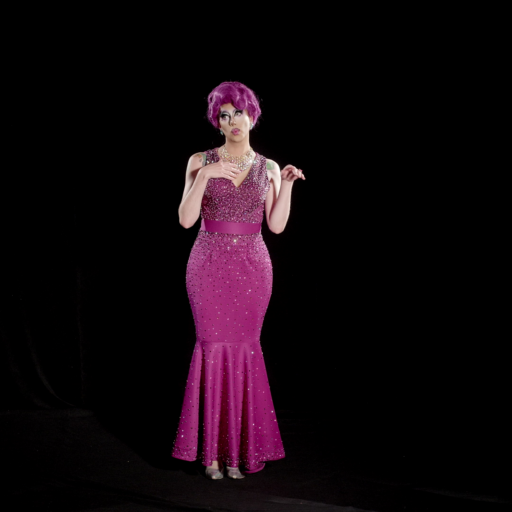

In [8]:
to_pil(dataset[111]["images"])

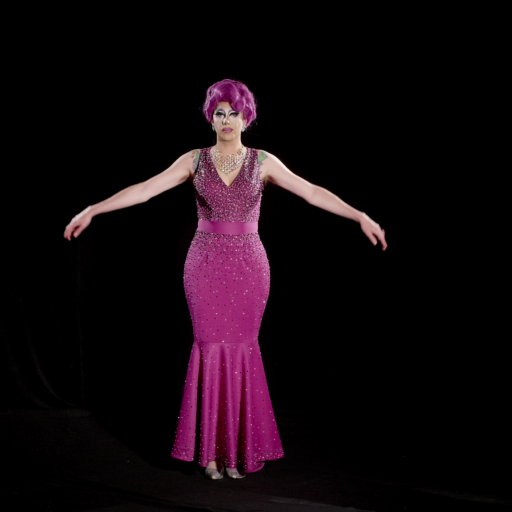

In [9]:
to_pil(dataset[33]["images"])

In [10]:
pipeline = ZiziVaePipeline.from_pretrained("trained-models/runpod-backup/pink-me-vae-512/checkpoint-39").to("mps")

The config attributes {'force_upcast': True} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [11]:
x = pipeline(dataset[111]["poses"].unsqueeze(0).to("mps"), batch_size=4, num_inference_steps=100).images

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
from train_v2 import make_grid

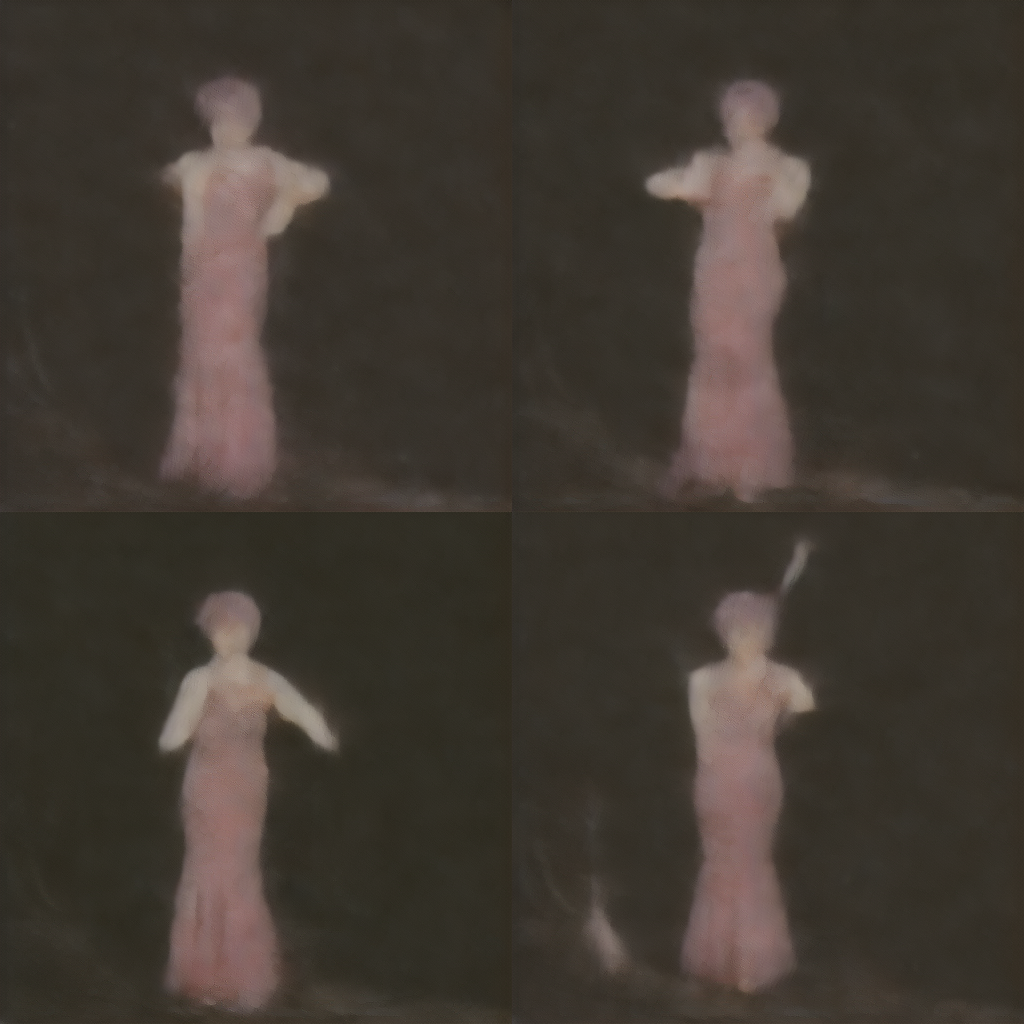

In [18]:
make_grid(x, 2, 2)

In [19]:
close = pipeline(dataset[33]["poses"].unsqueeze(0).to("mps"), batch_size=4, num_inference_steps=100).images

  0%|          | 0/100 [00:00<?, ?it/s]

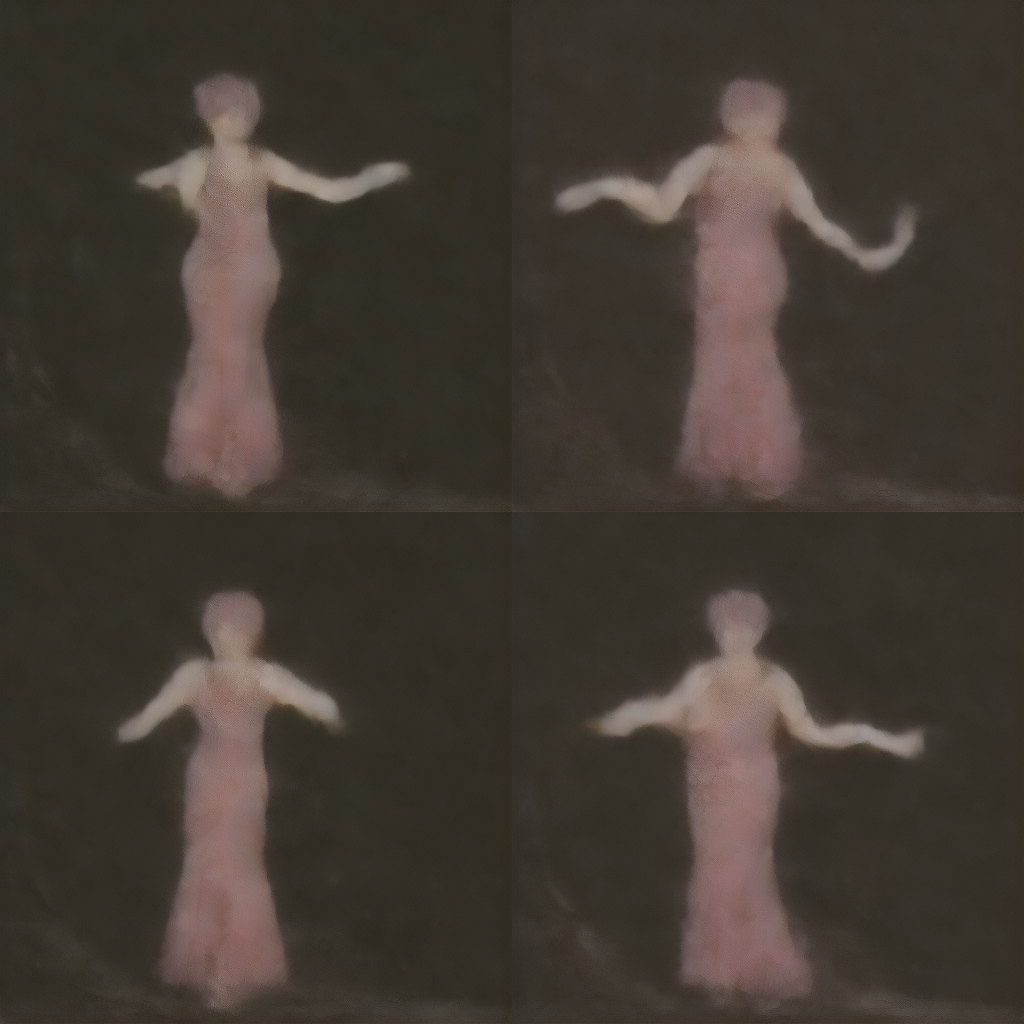

In [21]:
make_grid(close, 2, 2,)